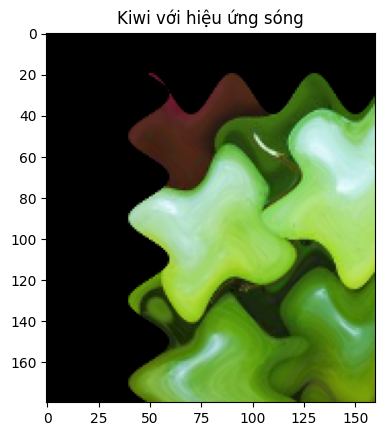

In [5]:
# Bài 1: Tịnh tiến và áp dụng hiệu ứng sóng cho quả kiwi
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import scipy.ndimage as nd

# Đọc ảnh
img = iio.imread('exercise/colorful-ripe-tropical-fruits.jpg')

# Cắt quả kiwi (cần chỉnh đúng vùng nếu sai)
kiwi = img[300:480, 920:1080]

# Tịnh tiến: 50 pixel sang phải, 30 pixel xuống dưới
kiwi_shifted = nd.shift(kiwi, shift=(30, 50, 0))

# Tạo hiệu ứng sóng bằng map_coordinates với hàm sin
H, W, _ = kiwi_shifted.shape
X, Y = np.meshgrid(np.arange(W), np.arange(H))
amplitude = 10
wave_X = X + amplitude * np.sin(2 * np.pi * Y / 40)
wave_Y = Y + amplitude * np.sin(2 * np.pi * X / 40)
coords = [wave_Y, wave_X]

# Áp dụng mapping cho từng kênh
wave_img = np.zeros_like(kiwi_shifted)
for c in range(3):
    wave_img[..., c] = nd.map_coordinates(kiwi_shifted[..., c], coords, order=1, mode='reflect')

# Hiển thị và lưu ảnh
plt.imshow(wave_img)
plt.title("Kiwi với hiệu ứng sóng")
plt.show()
iio.imsave("kiwi_wave.jpg", wave_img)



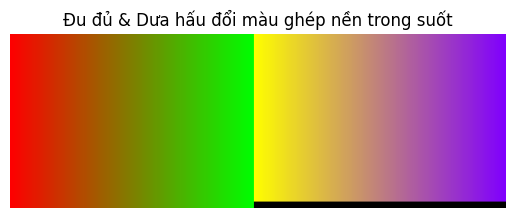

In [6]:
# Bài 2: Tạo gradient màu cho đu đủ và dưa hấu, ghép nền trong suốt

import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

# Bước 1: Đọc ảnh đu đủ và dưa hấu từ file riêng
papaya = iio.imread('exercise/papaya.jpg')
watermelon = iio.imread('exercise/watermelon.jpg')

# Bước 2: Tạo gradient màu
# Đu đủ: đỏ (R=255) sang xanh lá (G=255)
H1, W1, _ = papaya.shape
gradient_papaya = np.zeros_like(papaya)
gradient_papaya[..., 0] = np.tile(np.linspace(255, 0, W1, dtype=np.uint8), (H1, 1))  # Red
gradient_papaya[..., 1] = np.tile(np.linspace(0, 255, W1, dtype=np.uint8), (H1, 1))  # Green
gradient_papaya[..., 2] = 0  # Blue cố định

# Dưa hấu: vàng (RGB=255,255,0) sang tím (RGB=128,0,255)
H2, W2, _ = watermelon.shape
gradient_watermelon = np.zeros_like(watermelon)
gradient_watermelon[..., 0] = np.tile(np.linspace(255, 128, W2, dtype=np.uint8), (H2, 1))  # Red
gradient_watermelon[..., 1] = np.tile(np.linspace(255, 0, W2, dtype=np.uint8), (H2, 1))    # Green
gradient_watermelon[..., 2] = np.tile(np.linspace(0, 255, W2, dtype=np.uint8), (H2, 1))    # Blue

# Bước 3: Ghép ảnh lên nền trong suốt
max_height = max(H1, H2)
total_width = W1 + W2
canvas = np.zeros((max_height, total_width, 4), dtype=np.uint8)  # RGBA

# Ghép ảnh lên canvas
canvas[:H1, :W1, :3] = gradient_papaya
canvas[:H2, W1:, :3] = gradient_watermelon
canvas[..., 3] = 255  # Alpha đầy đủ

# Bước 4: Hiển thị và lưu
plt.imshow(canvas)
plt.title("Đu đủ & Dưa hấu đổi màu ghép nền trong suốt")
plt.axis("off")
plt.show()

# Lưu dưới dạng PNG có nền trong suốt
iio.imwrite("fruits_gradient_combined.png", canvas)



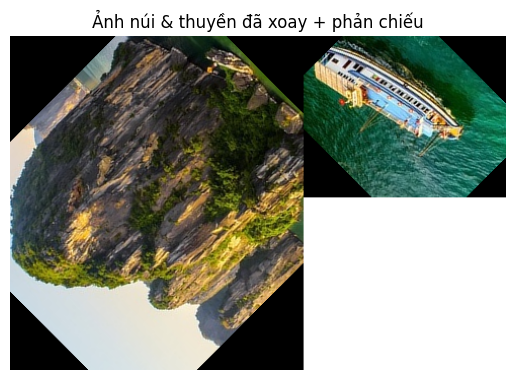

In [ ]:
# Bài 3: Xoay và phản chiếu đối xứng ảnh núi và thuyền.

import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import scipy.ndimage as nd

# Bước 1: Đọc ảnh đầu vào
img = iio.imread('exercise/quang_ninh.jpg')

# Bước 2: Cắt vùng chứa núi và thuyền (tọa độ cần điều chỉnh chính xác nếu cần)
mountain = img[0:330, 410:700]        # Núi ở phần trên
boat = img[420:580, 500:700]          # Thuyền ở phần dưới

# Bước 3: Xoay 45 độ (giữ nguyên kích thước reshape=False)
mountain_rot = nd.rotate(mountain, 45, reshape=False)
boat_rot = nd.rotate(boat, 45, reshape=False)

# Bước 4: Phản chiếu dọc (vertical mirror: lật ngược)
mountain_mirror = np.flipud(mountain_rot)
boat_mirror = np.flipud(boat_rot)

# Bước 5: Ghép lên canvas trắng (kích thước đủ chứa cả 2 ảnh)
H = max(mountain_mirror.shape[0], boat_mirror.shape[0])
W = mountain_mirror.shape[1] + boat_mirror.shape[1]
canvas = np.ones((H, W, 3), dtype=np.uint8) * 255  # màu trắng

# Ghép ảnh núi vào bên trái
canvas[:mountain_mirror.shape[0], :mountain_mirror.shape[1]] = mountain_mirror

# Ghép ảnh thuyền vào bên phải
x_offset = mountain_mirror.shape[1]
canvas[:boat_mirror.shape[0], x_offset:x_offset + boat_mirror.shape[1]] = boat_mirror

# Bước 6: Hiển thị và lưu kết quả
plt.imshow(canvas)
plt.title("Ảnh núi & thuyền đã xoay + phản chiếu")
plt.axis('off')
plt.show()

# Lưu ảnh kết quả
iio.imwrite('mountain_boat_mirror.jpg', canvas)


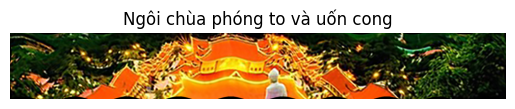

In [10]:
# Bài 4: Phóng to và áp dụng biến đổi hình học (uốn cong) ảnh ngôi chùa

import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import scipy.ndimage as nd

# Bước 1: Đọc ảnh gốc
img = iio.imread('exercise/pagoda.jpg')

# Bước 2: Cắt vùng ảnh chứa ngôi chùa
pagoda = img[130:210, 0:600]  # điều chỉnh nếu sai vùng

# Bước 3: Phóng to ảnh chùa lên 5 lần
zoomed = nd.zoom(pagoda, (5, 5, 1))

# Bước 4: Định nghĩa hàm biến đổi geometric (uốn cong)
def warp(coord):
    y, x = coord
    new_y = y + 15 * np.sin(x / 50.0)
    new_x = x + 10 * np.cos(y / 40.0)
    return new_y, new_x

# Bước 5: Áp dụng geometric_transform từng kênh màu
warped = np.zeros_like(zoomed)
for c in range(3):
    warped[..., c] = nd.geometric_transform(zoomed[..., c], warp, order=1)

# Bước 6: Hiển thị kết quả
plt.imshow(warped.astype(np.uint8))
plt.title("Ngôi chùa phóng to và uốn cong")
plt.axis("off")
plt.show()

# Bước 7: Lưu kết quả
iio.imwrite('pagoda_warped.jpg', warped.astype(np.uint8))
